# 7.1 Handwritten Digit Recognition with Neural Network

# Loading Dataset

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# Load MINST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


# Pre-processing the dataset

In [ ]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
print(x_train[:5])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
print(y_test[:5])

[7 2 1 0 4]


In [ ]:
# Printing the shapes of the loaded data
print("Shape of x_train:", x_train.shape) #Training images
print("Shape of y_train:", y_train.shape) #Training labels
print("Shape of x_test:", x_test.shape) #Testing Images
print("Shape of y_test:", y_test.shape) #Testing Labels

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


# Visualization

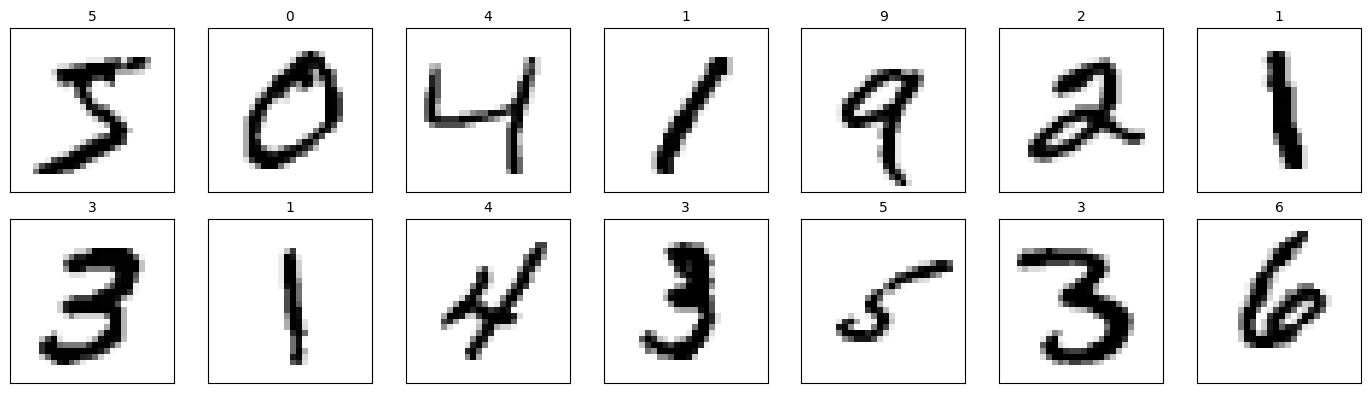

In [ ]:
import matplotlib.pyplot as plt
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(14, 4)) #Starting 14 images and checking images and labels are correctly align or not
for i in range(14):
    plt.subplot(2, 7, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]], fontsize=10)
plt.tight_layout()
plt.show()

# Model Building

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), #2d to 1d
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #ouput layer 10
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
nn_model = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 33s 21ms/step - loss: 0.2619 - accuracy: 0.9234 - val_loss: 0.1388 - val_accuracy: 0.9592
Epoch 2/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1142 - accuracy: 0.9655 - val_loss: 0.1091 - val_accuracy: 0.9672
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0801 - accuracy: 0.9753 - val_loss: 0.0980 - val_accuracy: 0.9701
Epoch 4/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0964 - val_accuracy: 0.9708
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0941 - val_accuracy: 0.9716


# Model Evaluation  

In [ ]:
# Evaluate the model
results = model.evaluate(x_test, y_test)

# Unpack the results
test_loss = results[0]
test_accuracy = results[1]
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9735
Test Accuracy: 0.9735000133514404
Test Loss: 0.08046471327543259


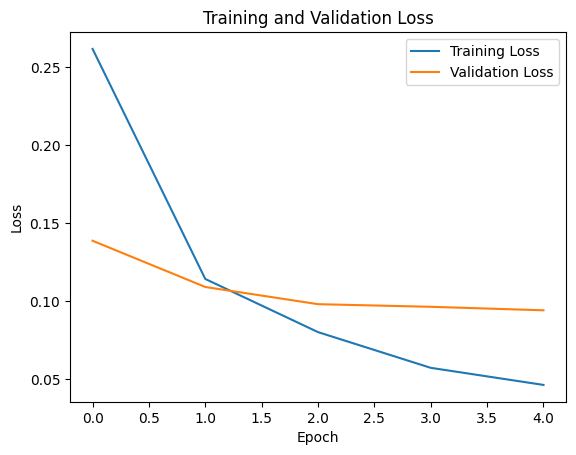

In [ ]:
# Plot training and validation loss
plt.plot(nn_model.history['loss'], label='Training Loss')
plt.plot(nn_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

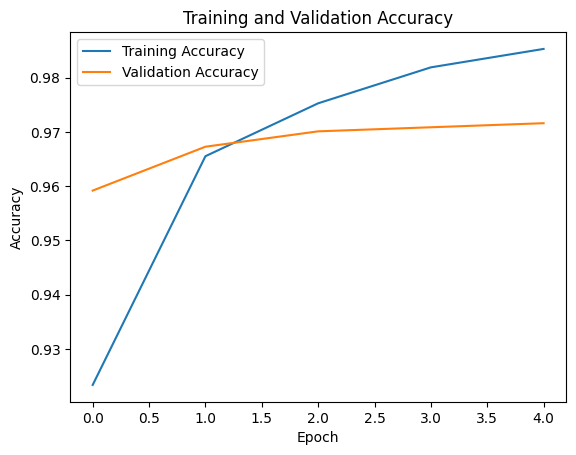

In [ ]:
# Plot training and validation accuracy
plt.plot(nn_model.history['accuracy'], label='Training Accuracy')
plt.plot(nn_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)#ratio of correctly classified samples to the total number of samples in the dataset.
print("Precision:", precision)#proportion of true positive predictions out of all positive predictions
print("Recall:", recall)#proportion of true positive predictions out of all actual positive instances
print("F1-score:", f1)#harmonic mean of precison and recall

313/313 [==============================] - 4s 14ms/step
Accuracy: 0.9735
Precision: 0.9737677654667785
Recall: 0.9735
F1-score: 0.973524838438682


Confusion Matrix:
[[ 972    1    2    1    0    1    1    1    1    0]
 [   0 1117    2    0    0    0    2    5    9    0]
 [   9    1  994    4    1    0    2   13    7    1]
 [   0    0    2  989    0    7    0    4    2    6]
 [   2    0    3    1  934    1    4    5    2   30]
 [   3    0    0   13    0  862    5    1    2    6]
 [   9    2    2    1    5    6  931    0    1    1]
 [   2    0    4    2    0    0    0 1006    3   11]
 [   3    0    4    7    2    4    1    2  944    7]
 [   3    2    0    5    4    0    0    6    3  986]]


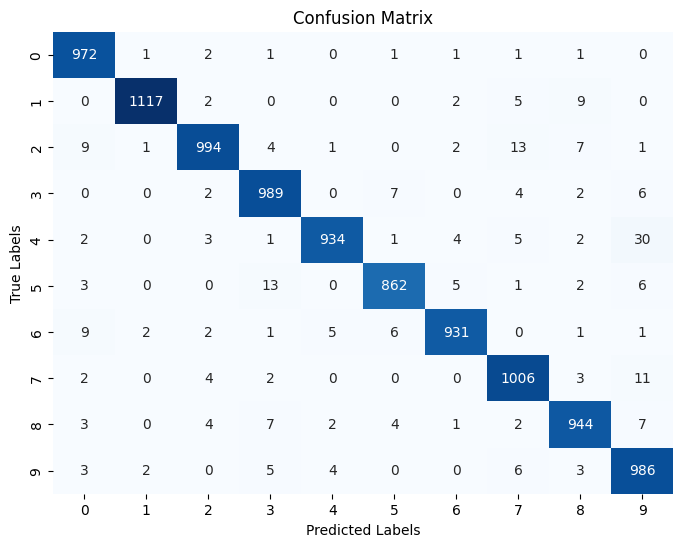

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

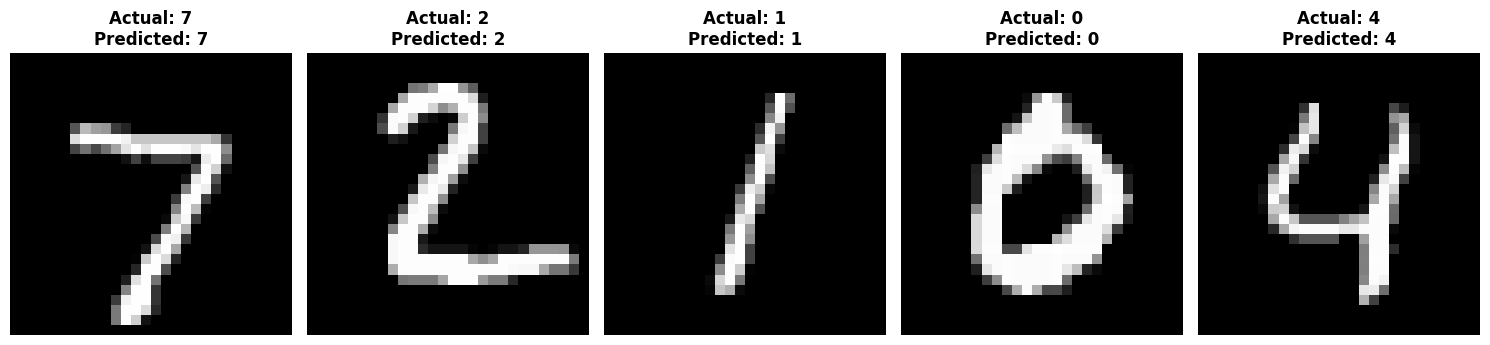

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[i]}\nPredicted: {y_pred[i]}", fontsize=12, fontweight='bold')
    plt.axis('off')
plt.tight_layout()
plt.show()